<a href="https://colab.research.google.com/github/Quantium/notebooks/blob/master/Kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#@title Dark Mode
plt.style.use('seaborn-v0_8-whitegrid')

plt.style.use('dark_background')
plt.rcParams.update({
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
    'lines.markersize': 5,
    'font.size': 10,
    'figure.figsize': (8, 6),
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'legend.edgecolor': 'white',
    'legend.frameon': True,
    'legend.fancybox': False,
})

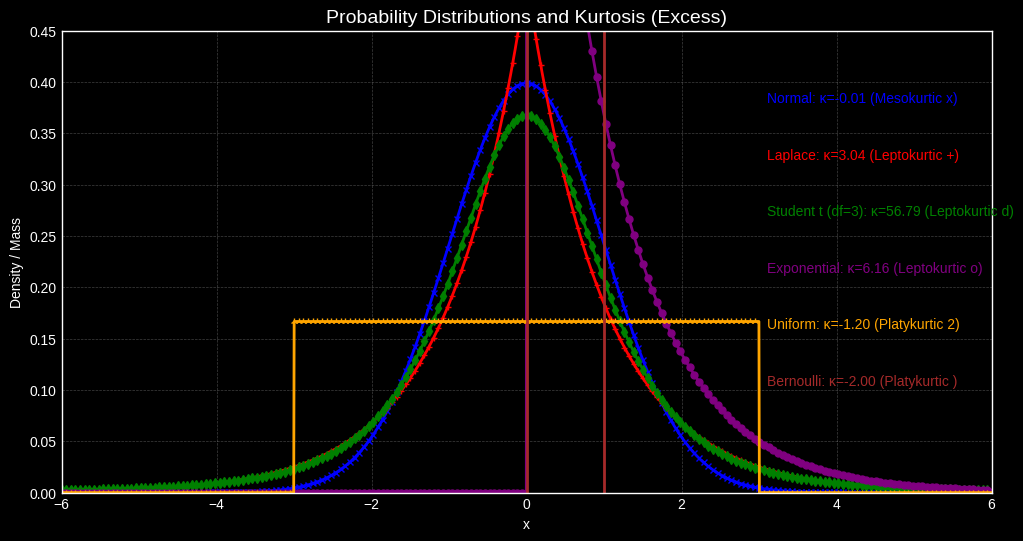

In [24]:
from scipy.stats import (
    norm, laplace, uniform, expon, t, bernoulli, kurtosis
)

# Reproducibility
np.random.seed(42)

# Sample size
n = 100_000
x = np.linspace(-6, 6, 2000)

# Distributions: (name, samples, pdf, color, marker)
distributions = [
    ("Normal", norm.rvs(size=n), norm.pdf(x), "blue","x"),
    ("Laplace", laplace.rvs(size=n), laplace.pdf(x), "red","+"),
    ("Student t (df=3)", t.rvs(df=3, size=n), t.pdf(x, df=3), "green","d"),
    ("Exponential", expon.rvs(size=n), expon.pdf(x), "purple","o"),
    ("Uniform", uniform.rvs(loc=-3, scale=6, size=n), uniform.pdf(x, loc=-3, scale=6), "orange","2"),
    ("Bernoulli", bernoulli.rvs(p=0.5, size=n), None, "brown","")
]

plt.figure(figsize=(12, 6))

y_offset = 0.38  # vertical position for annotations
dy = 0.055       # spacing between labels

for i, (name, samples, pdf, color,marker) in enumerate(distributions):
    # Plot PDFs (Bernoulli handled separately)
    if pdf is not None:
        plt.plot(x, pdf, color=color, linewidth=2,marker=marker,markevery=10)
    else:
        # Bernoulli as spikes
        plt.vlines([0, 1], 0, [0.5, 0.5], color=color, linewidth=2)

    # Excess kurtosis
    k = kurtosis(samples, fisher=True)

    # Kurtosis type
    if np.isinf(k) or k > 0.5:
        k_type = "Leptokurtic"
    elif k < -0.5:
        k_type = "Platykurtic"
    else:
        k_type = "Mesokurtic"

    # Annotation
    label = f"{name}: κ={k:.2f} ({k_type} {marker})"
    plt.text(
        3.1, y_offset - i * dy,
        label,
        color=color,
        fontsize=10
    )

# Plot styling
plt.title("Probability Distributions and Kurtosis (Excess)", fontsize=14)
plt.xlabel("x")
plt.ylabel("Density / Mass")
plt.xlim(-6, 6)
plt.ylim(0, 0.45)
plt.grid(alpha=0.3)

plt.show()
